# Project Day

`COSC210`
`Soobin Rho`
***

<center><b><em>Making a Class</em></b></center>

4 Attributes in the parent class, 1 additional (5 total) attributes in the child class
    - Attributes must contain 4 of the 8 data types covered in class (int, float, str, list, tuple, dict, set, or array)
    - Make use of a Default value for one of the parameters in your class(es)
- 2 custom Methods in the parent class, 1 new method in the child class, 1 of the 2 methods in the parent class must be modified in the child class
    - Methods will have some action that uses the attributes
    - One method must be a recursive function
- init, repr, and str methods in both classes, modified using the super() function in the child class
- Must use Getter methods for ALL attributes and have attributes hidden behind the single underscore
- Use setter methods for two attributes
You will be graded on meeting the above minimum requirements for the classes, the use of comments and docstrings in your code, as well as proper functioning of the code. Once you have created your classes, you must demonstrate the use of them in a Jupyter Notebook. Create some instances of them and use the methods, check attributes, and show that errors will pop up if they are not used correctly. 

In [2]:
'''A Class for Graphing a Right-Angle Triangle.'''
import sys
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib_inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Setting the graph's file format as 'svg' for 
# Jupyter Lab inline display and 'pdf' for exporting.
matplotlib_inline.backend_inline.set_matplotlib_formats('svg', 'pdf')

# Making the graph look nice with seaborn.
sns.set_theme()

# +++++++++++++++++++++++++++++++++++++++++++++++++++
# A note to my future self. When writing a class, 
# you might find these videos helpful.
#
# "Python's Class Development Toolkit"
#     :  by Raymond Hettinger
#     :  https://www.youtube.com/watch?v=HTLu2DFOdTg
#
# "Best practices for beautiful intelligible code"
#     :  by Raymond Hettinger
#     :  https://www.youtube.com/watch?v=wf-BqAjZb8M
# +++++++++++++++++++++++++++++++++++++++++++++++++++
# Plus, Hettinger recommends namedtuples sometimes.
#
# from collections import namedtuple
# Color = namedtuple('Color', ['hue', 'saturation'])
# color_1 = Color(170, 0.1)
# color_1.saturation

class Graph_Right_Angle_Trinalge(object):
    '''
        This class is a wrapper around matplotlib,
        specialized for graphing a right-angle triangle.
        
        Example:
        
            triangle_1 = Graph_Right_Angle_Trinalge(
                len_adjacent=12,
                len_opposite=12
            )
            triangle_1.show()        
        
    '''
    
    # ------------------------------------------ #
    # Class-level Variables
    # ------------------------------------------ #
    version = '1.0'

    # ------------------------------------------ #
    # Initializer
    # ------------------------------------------ #    
    def __init__(
            # The instance being initialized.
            self,
        
            # The two most important parameters. 
            # Note that the length of the hypotenuse is not
            # here because it'll be automaticlaly calculated.
            len_adjacent: float = 12,
            len_opposite: float = 12,
        
            # Optional parameters for aesthetics.
            color_triangle: str = 'k',
            width_triangle: float = 2,
            width_grid_line: float = 0.5,
            coordinates_starting: list = [4, 4],
            figure_size: list = [3, 3],
            figure_xlim: list = [0, 20],
            figure_ylim: list = [0, 20],
            xmultiplelocator: float = 2,
            ymultiplelocator: float = 2,
            annotation_adjacent: dict = {
                'text': r' ',
                'xy': (0, 0),
                'xytext': (7.5, 1.6),
                'fontsize': 12
            },
            annotation_opposite: dict = {
                'text': r' ',
                'xy': (0, 0),
                'xytext': (16.6, 9),
                'fontsize': 12
            },
            annotation_hypotenuse: dict = {
                'text': r' ',
                'xy': (0, 0),
                'xytext': (9, 10.7),
                'fontsize': 12
            },
            annotation_theta: dict = {
                'text': r' ',
                'xy': (0, 0),
                'xytext': (5.6, 4.4),
                'fontsize': 12
            }                 
        ):
        
        self.len_adjacent = len_adjacent
        self.len_opposite = len_opposite
        self.color_triangle = color_triangle
        self.width_triangle = width_triangle
        self.width_grid_line = width_grid_line
        self.coordinates_starting = coordinates_starting
        self.figure_size = figure_size
        self.figure_xlim = figure_xlim
        self.figure_ylim = figure_ylim
        self.xmultiplelocator = xmultiplelocator
        self.ymultiplelocator = ymultiplelocator
        self.annotation_adjacent = annotation_adjacent
        self.annotation_opposite = annotation_opposite  
        self.annotation_hypotenuse = annotation_hypotenuse
        self.annotation_theta = annotation_theta      
        
    # ------------------------------------------ #
    # Getters and Setters
    # ------------------------------------------ #         
    @property
    def len_hypotenuse(self):
        '''
            The length of the hypotenuse is calculated
            using the Pythagorean Theorem. Note that the
            user never inputs the length of hypotenuse
            when initializing an instance of this class.

            Instead, the user only inputs the lengths of
            the adjacent and the opposite.        
        '''
        self._len_hypotenuse = self.len_adjacent ** 2
        self._len_hypotenuse += self.len_opposite ** 2 
        self._len_hypotenuse = np.sqrt(self._len_hypotenuse)         
        return self._len_hypotenuse   
    
    @property
    def len_adjacent(self):
        return self._len_adjacent

    @len_adjacent.setter
    def len_adjacent(self, len_adjacent):
        # If the input value is zero or negative,
        # raise ValueError.
        if len_adjacent <= 0:
            raise ValueError(f'Invalid len_adjacent')
        self._len_adjacent = len_adjacent
        
    @property
    def len_opposite(self):
        return self._len_opposite

    @len_opposite.setter
    def len_opposite(self, len_opposite):
        # If the input value is zero or negative,
        # raise ValueError.
        if len_opposite <= 0:
            raise ValueError(f'Invalid len_opposite')        
        self._len_opposite = len_opposite
        
    @property
    def color_triangle(self):
        return self._color_triangle
    
    @color_triangle.setter
    def color_triangle(self, color_triangle):
        self._color_triangle = color_triangle
    
    @property
    def width_triangle(self):
        return self._width_triangle
    
    @width_triangle.setter
    def width_triangle(self, width_triangle):
        self._width_triangle = width_triangle
    
    @property
    def width_grid_line(self):
        return self._width_grid_line
    
    @width_grid_line.setter
    def width_grid_line(self, width_grid_line):
        self._width_grid_line = width_grid_line
        
    @property
    def coordinates_starting(self):
        return self._coordinates_starting
    
    @coordinates_starting.setter
    def coordinates_starting(self, coordinates_starting):
        self._coordinates_starting = coordinates_starting        
    
    @property
    def figure_size(self):
        return self._figure_size
    
    @figure_size.setter
    def figure_size(self, figure_size):
        self._figure_size = figure_size
    
    @property
    def figure_xlim(self):
        return self._figure_xlim
    
    @figure_xlim.setter
    def figure_xlim(self, figure_xlim):
        self._figure_xlim = figure_xlim
    
    @property
    def figure_ylim(self):
        return self._figure_ylim
    
    @figure_ylim.setter
    def figure_ylim(self, figure_ylim):
        self._figure_ylim = figure_ylim
        
    @property
    def xmultiplelocator(self):
        return self._xmultiplelocator
    
    @xmultiplelocator.setter
    def xmultiplelocator(self, xmultiplelocator):
        self._xmultiplelocator = xmultiplelocator
        
    @property
    def ymultiplelocator(self):
        return self._ymultiplelocator
    
    @ymultiplelocator.setter
    def ymultiplelocator(self, ymultiplelocator):
        self._ymultiplelocator = ymultiplelocator
    
    @property
    def annotation_adjacent(self):
        return self._annotation_adjacent
    
    @annotation_adjacent.setter
    def annotation_adjacent(self, annotation_adjacent):
        self._annotation_adjacent = annotation_adjacent
    
    @property
    def annotation_opposite(self):
        return self._annotation_opposite
    
    @annotation_opposite.setter
    def annotation_opposite(self, annotation_opposite):
        self._annotation_opposite = annotation_opposite
    
    @property
    def annotation_hypotenuse(self):
        return self._annotation_hypotenuse
    
    @annotation_hypotenuse.setter
    def annotation_hypotenuse(self, annotation_hypotenuse):
        self._annotation_hypotenuse = annotation_hypotenuse
    
    @property
    def annotation_theta(self):
        return self._annotation_theta
    
    @annotation_theta.setter
    def annotation_theta(self, annotation_theta):
        self._annotation_theta = annotation_theta
        
    # ------------------------------------------ #
    # __repr__ and __str__
    # ------------------------------------------ #            
    def __repr__(self):
        '''Returns the string for repr(...)'''
        
        # Returning the attributes in a nice format.
        # DataFrame is used here because it
        # automatically adjusts alignments.
        repr_string = '__class__.__name__ = '
        repr_string += f'"{self.__class__.__name__}"\n'
        repr_string += str(
            pd.DataFrame(
                [
                    [f'{self.len_adjacent:.2f}'],
                    [f'{self.len_opposite:.2f}'],
                    [f'{self.len_hypotenuse:.2f}']
                ],
                index=[
                    'Adjacent',
                    'Opposite',
                    'Hypotenuse'
                ],
                columns=[' ']
            )
        )
        return repr_string        
    
    def __str__(self):
        '''Returns the string for print(...)'''
        
        # Returning a string similar to __repr__
        # However, the difference is that __repr__
        # includes __class__.__name__ at the top while
        # this __str__ doesn't include it.
        repr_string = str(
            pd.DataFrame(
                [
                    [f'{self.len_adjacent:.2f}'],
                    [f'{self.len_opposite:.2f}'],
                    [f'{self.len_hypotenuse:.2f}']
                ],
                index=[
                    'Adjacent',
                    'Opposite',
                    'Hypotenuse'
                ],
                columns=[' ']
            )
        )
        return repr_string   
    
    # ------------------------------------------ #
    # Methods
    # ------------------------------------------ #
    
    def show(self):
        '''
            1. Initializes a matplotlib plot.
            2. Plots the triangle.
            3. Plots the annotations.
        '''

        # 1. Initializes a matplotlib plot.
        fig = plt.figure(figsize=self.figure_size)    
        ax = plt.gca()
        ax.tick_params(labelbottom=False, labelleft=False)
        ax.yaxis.set_major_locator(MultipleLocator(self.xmultiplelocator))
        ax.xaxis.set_major_locator(MultipleLocator(self.ymultiplelocator))
        ax.grid(linewidth=self.width_grid_line)
        ax.set_aspect('equal')
        ax.set_xlim(self.figure_xlim[0], self.figure_xlim[1])
        ax.set_ylim(self.figure_ylim[0], self.figure_ylim[1])

        # 2. Plots the triangle.
        x = self.coordinates_starting[0]
        y = self.coordinates_starting[1]
        left = (x, y)
        right = (x + self.len_adjacent, y)
        top = (x + self.len_adjacent, y + self.len_opposite)
        points = np.array([left, right, top])
        pivot = plt.Polygon(
            points, 
            closed=True,  
            fill=False,
            edgecolor=self.color_triangle,
            linewidth=self.width_triangle
        )
        ax.add_patch(pivot)        
        
        # 3. Plots the annotations.    
        plt.annotate(**self.annotation_adjacent)
        plt.annotate(**self.annotation_opposite)
        plt.annotate(**self.annotation_hypotenuse)
        plt.annotate(**self.annotation_theta)

        # Displaying the graph.
        plt.show()    
    
    def print_figure_parameters(self):
        '''Prints all the parameters.'''
  
        # Converting __dict__ into two lists.
        list_keys = []
        list_values = []
        for key in list(self.__dict__):
            list_keys.append(key)
            list_values.append(self.__dict__[key])
            
        # Printing the parameters in the form of a dataframe
        # because dataframes look pretty.
        dataframe = pd.DataFrame(list_values, index=list_keys, columns=['Parameters'])
        display(dataframe)
        
    def get_max_length(self):
        '''
            Unnecessary function, but I made a
            recursive function as an exercise
            for making recursive functions.
        '''
        
        # Reusing HW14.
        def _get_max(        
                # Through each recursion,
                # the list gets smaller by one element.
                input_list: list, 

                # Assigning the lowest possible float as the
                # default value of current_max value.
                current_max: float = math.floor(-(sys.float_info.max))
            ) -> float:
            '''A recursive function for finding the max value in a list.'''

            # Checking if the list has a bigger value than current_max.
            if input_list[0] > current_max: 
                current_max = input_list[0]

            # --------------------------------------------- #
            # The Base Case
            # --------------------------------------------- #
            # If there's only one element left in input_list,
            # stop the recursion and return current_max.
            if len(input_list) == 1: return current_max

            # --------------------------------------------- #
            # The Recursive Step
            # --------------------------------------------- #    
            # Until there's no more element left in input_list,
            # call the function itself recursively.
            else: return get_max(input_list[1:], current_max)      
        
        # Finding the maximum value among the adjacent, oppoiste, 
        # and hypotenuse.
        input_list = [
            self.len_adjacent,
            self.len_opposite,
            self.len_hypotenuse
        ]
        max_value = _get_max(input_list)

        # Printing the results.
        print(
            'As you may well know, the hypotenuse of a triangle ' +
            '- by its own definition - is always longer than the adjacent and the opposite.\n' +
            'In fact, as you can see, ' +
            f'this triangle\'s hypotenuse ({max_value:.2f}) is ineed the longest:'
        )
        print(self)
        

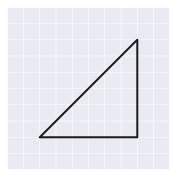

,Parameters
_len_adjacent,12
_len_opposite,12
_color_triangle,k
_width_triangle,2
_width_grid_line,0.5
_coordinates_starting,"[4, 4]"
_figure_size,"[3, 3]"
_figure_xlim,"[0, 20]"
_figure_ylim,"[0, 20]"
_xmultiplelocator,2


As you may well know, the hypotenuse of a triangle - by its own definition - is always longer than the adjacent and the opposite.
In fact, as you can see, this triangle's hypotenuse (16.97) is ineed the longest:
                 
Adjacent    12.00
Opposite    12.00
Hypotenuse  16.97


In [91]:
triangle_1 = Graph_Right_Angle_Trinalge(
    len_adjacent=12,
    len_opposite=12
)
triangle_1.show()
triangle_1.print_figure_parameters()
triangle_1.get_max_length()

In [34]:
''' A Hypothetical Child Class.'''

class Graph_Right_Angle_Trinalge_Pig_Latin(Graph_Right_Angle_Trinalge):
    '''   
        This child class is created merely as a class exercise.
        Please note that this may not make any sense.
        
        What this does is that it annotates 
        Pig Latin alongisde the triangle.
        
        Example:
        
    '''
    
    def __init__(self, input_str: str):
        '''Initializes an instance of this child class.'''
        
        # Inheriting from the parent class.
        super().__init__()
        
        # Initializing input_str
        self.input_str = input_str
        
    # ------------------------------------------ #
    # Getters and Setters
    # ------------------------------------------ #         
    @property
    def input_str(self):
        return self._input_str

    @input_str.setter
    def input_str(self, input_str):
        self._input_str = input_str
        
    # ------------------------------------------ #
    # __repr__ and __str__
    # ------------------------------------------ #            
#     def __repr__(self):
#         '''Returns the string for repr(...)'''
        
#         repr_string = super().__repr__
#         return repr_string        
    
#     def __str__(self):
#         '''Returns the string for print(...)'''
        
#         repr_string = super().__str__
#         return repr_string   
        
    # ------------------------------------------ #
    # Methods
    # ------------------------------------------ #
    
    def convert_to_piglatin(self) -> str:
        '''
            1. Uses split() to make a list of 
               words in the sentence.
            2. Loops through every word.
            3. Translates each word to pig Latin
               if the word has two or more letters.
        '''

        # 1. Uses split() to make a list of 
        #    words in the sentence.
        str_converted = self.input_str
        list_words = str_converted.split()

        # Initializing a list of converted words.
        list_converted_words = []

        # 2. Loops through every word.
        for word in list_words:

            # 3. Translates each word to pig Latin
            #    if the word has two or more letters.
            if len(word) >= 2:

                # Storing the first letter.
                firstletter = word[0]

                # Moving the first letter to the back.
                converted_word = word[1:]
                converted_word += f'{firstletter}ay'

                # Storing the converted word into the list.
                list_converted_words.append(converted_word)

            # Chaning nothing if the word 
            # has fewer than two letters.
            else:
                list_converted_words.append(word)

        # Inserting the converted words back.
        # The reason why I make a new list instead of 
        # directly using str_input.replace() is because
        # we should preserve any white space between words.
        #
        # This way, any white space between words
        # can be preserved.
        for count in range(len(list_words)):
            str_converted = str_converted.replace(
                list_words[count],
                list_converted_words[count]
            )

        return str_converted    
    
    def show(self):
        '''
            1. Initializes a matplotlib plot.
            2. Plots the triangle.
            3. Plots the Pig Latin.
        '''

        # 1. Initializes a matplotlib plot.
        fig = plt.figure(figsize=self.figure_size)    
        ax = plt.gca()
        ax.tick_params(labelbottom=False, labelleft=False)
        ax.yaxis.set_major_locator(MultipleLocator(self.xmultiplelocator))
        ax.xaxis.set_major_locator(MultipleLocator(self.ymultiplelocator))
        ax.grid(linewidth=self.width_grid_line)
        ax.set_aspect('equal')
        ax.set_xlim(self.figure_xlim[0], self.figure_xlim[1])
        ax.set_ylim(self.figure_ylim[0], self.figure_ylim[1])

        # 2. Plots the triangle.
        x = self.coordinates_starting[0]
        y = self.coordinates_starting[1]
        left = (x, y)
        right = (x + self.len_adjacent, y)
        top = (x + self.len_adjacent, y + self.len_opposite)
        points = np.array([left, right, top])
        pivot = plt.Polygon(
            points, 
            closed=True,  
            fill=False,
            edgecolor=self.color_triangle,
            linewidth=self.width_triangle
        )
        ax.add_patch(pivot)        
        
        # 3. Plots the Pig Latin.     
        annotation: dict = {
            'text': self.convert_to_piglatin(),
            'xy': (0, 0),
            'xytext': (5.6, 4.4),
            'fontsize': 10
        }         
        plt.annotate(**annotation)

        # Displaying the graph.
        plt.show()                 
    

In [38]:
test = Graph_Right_Angle_Trinalge_Pig_Latin('Hi there')
test

__class__.__name__ = "Graph_Right_Angle_Trinalge_Pig_Latin"
                 
Adjacent    12.00
Opposite    12.00
Hypotenuse  16.97

***

<center><em>----- End of Page -----</em><center>

<br>
<br>
<br>